In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,precision_score,recall_score,roc_curve,roc_auc_score,classification_report
import matplotlib.pyplot as plt





In [2]:
sw_en=stopwords.words('english')

tokenizer=RegexpTokenizer(r'\w+')

lemmatizer=WordNetLemmatizer()

tfidf=TfidfVectorizer()

In [3]:
review=pd.read_csv("Amazon_reviews.csv")
pd.set_option("display.max_colwidth",1000)
review.sample(3)

,Review,Label
142,"Not Patterns - but Detailed Sketches: Although I was excited to purchase this book, my excitement didn't last when I looked at the sketches / pictures in the book. I call them pictures because that is what they truly are, not actual patterns. Norma Gregory's talent shows up well in her designs but due to their complicated rendering they are very difficult to transfer.This book is not for beginners - but more seasoned artisans.If you are looking for patterns, like I was, you will be disappointed in this book.",0
66,"Definitely enjoyed!: This was a gift for my 6 yr old daughter. She is a big Barbie fan as well as loves to use the computer. She is still enjoying this game. She completed it in a few hours which worried me at first, but she loves to do it over and over again. The music is enjoyable and the colors are vibrant. It seems to be very user friendly also....my daughter has not really needed my help to use it once she started it the first time.",1
131,"Outstanding guidebook for building your own timberframe home: My wife and I built a hybrid timber frame home using this book as a guide. Although we have construction skills, this book was invaluable in guiding us through the process. We can't wait to build another. We highly recommend this book to anyone considering a timber frame house.",1


# Seperate the dependent and independent column, here is Label=Dependent and Review=Independent  

In [4]:
y = review["Label"]
review.drop(columns="Label",inplace=True)


# Splitting the train and test data

In [5]:
X_train,X_test,y_train,y_test=train_test_split(review,y,test_size=0.3,random_state=20)

In [6]:
print("x_train",X_train.shape)
print("y_train",y_train.shape)
print("x_test",X_test.shape)
print("y_test",y_test.shape)

x_train (139, 1)
y_train (139,)
x_test (60, 1)
y_test (60,)


# Preprocessing on Independent variable

# steps--
       1. convert all reviews in lower case
       2.Tokenized
       3.Remove Stopwords from tokens
       4.Stemming and lemmetizing using porter and wordnet lamettizer

In [7]:
def preprocessing(review):
    
    tokens=tokenizer.tokenize(review) # tokenizing
    pure_tokens=[token.lower() for token in tokens if token.lower() not in sw_en] # removing stop words
    lemma_tokens=[lemmatizer.lemmatize(pure_token,pos='v') for pure_token in pure_tokens] # lemmatizing
    
    
    return ' '.join(lemma_tokens)
    
    

In [8]:
X_train["Review"]=X_train["Review"].apply(preprocessing)
X_test["Review"]=X_test["Review"].apply(preprocessing)

<ipython-input-8-281e8ad5ac77>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["Review"]=X_train["Review"].apply(preprocessing)
<ipython-input-8-281e8ad5ac77>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["Review"]=X_test["Review"].apply(preprocessing)


In [9]:
X_train["Review"].head(2)

134    poor instructions figure kinda cool wrap anything place hot water search internet find others problem instructions poor first need dip boil water least temperature level would call hot second instructions describe happen image shrink around egg transfer needle say frustrate minute two wife intelligent great kitchen immediately think well hot water much change properties plastic let try boil water nothing lose explicit instructions use star war version product
62                                                                                                              scrap across whole top purchase screen last week come noticeable scrap across top box come gigantic plenty package material screen package loosely bottom however since another smaller box think scrap begin ship still decide whether go trouble exchange since another reviewer say damage want risk get another damage really need screen right damage nice screen
Name: Review, dtype: object

In [10]:
X_train_tfidf=tfidf.fit_transform(X_train['Review'])
X_test_tfidf=tfidf.transform(X_test['Review'])


In [11]:
log = LogisticRegression()
log.fit(X_train_tfidf,y_train)
pred=log.predict(X_test_tfidf)


In [12]:
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [13]:
confusion_matrix(y_test,pred)

array([[ 5, 25],
       [ 0, 30]], dtype=int64)

In [14]:
precision_score(y_test,pred)*100

54.54545454545454

In [15]:
recall_score(y_test,pred)*100

100.0

In [16]:
roc_curve(y_test,pred)

(array([0.        , 0.83333333, 1.        ]),
 array([0., 1., 1.]),
 array([2, 1, 0], dtype=int64))

In [17]:
roc_auc_score(y_test,pred)*100

58.33333333333333

# Positive Probability

In [18]:
pos_probability=log.predict_proba(X_test_tfidf)[::,1]
pos_probability

array([0.65155738, 0.53706432, 0.57299429, 0.6205563 , 0.60386081,
       0.69110384, 0.52687736, 0.61439631, 0.57599536, 0.54992281,
       0.59694877, 0.5613887 , 0.56385783, 0.66476966, 0.58962915,
       0.46437929, 0.56180582, 0.62988748, 0.71065003, 0.58830982,
       0.57265992, 0.67537391, 0.54089909, 0.52952086, 0.57495665,
       0.48886564, 0.48142851, 0.61240606, 0.60210484, 0.5686073 ,
       0.53684326, 0.64719645, 0.60308295, 0.61562133, 0.60094864,
       0.62746849, 0.62337236, 0.47885696, 0.56536133, 0.58377537,
       0.54390073, 0.63814382, 0.62166381, 0.55754341, 0.57011901,
       0.54861969, 0.66597045, 0.5769878 , 0.63698121, 0.60226126,
       0.69117515, 0.64092197, 0.58685496, 0.63409015, 0.4534605 ,
       0.60614652, 0.59120997, 0.58194554, 0.60328501, 0.54635549])

In [19]:
fpr,tpr,threeshold=roc_curve(y_test,pos_probability)
fpr,tpr

(array([0.        , 0.03333333, 0.03333333, 0.06666667, 0.06666667,
        0.13333333, 0.13333333, 0.16666667, 0.16666667, 0.2       ,
        0.2       , 0.26666667, 0.26666667, 0.33333333, 0.33333333,
        0.4       , 0.4       , 0.46666667, 0.46666667, 0.5       ,
        0.5       , 1.        ]),
 array([0.        , 0.        , 0.16666667, 0.16666667, 0.3       ,
        0.3       , 0.6       , 0.6       , 0.63333333, 0.63333333,
        0.66666667, 0.66666667, 0.8       , 0.8       , 0.86666667,
        0.86666667, 0.93333333, 0.93333333, 0.96666667, 0.96666667,
        1.        , 1.        ]))

Text(0.5, 0, 'TRUE POSITIVE RATE')

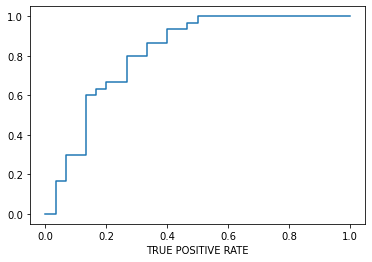

In [20]:
plt.plot(fpr,tpr)
plt.xlabel("FALSE POSITIVE RATE")
plt.xlabel("TRUE POSITIVE RATE")

